In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
uniq_id_cust    = pd.read_csv ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lesihina/first_project/olist_customers_dataset.csv')
orders          = pd.read_csv ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lesihina/first_project/olist_orders_dataset.csv')
items           = pd.read_csv ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lesihina/first_project/olist_order_items_dataset.csv')

#### Задание 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [4]:
# Посмотрим какие возможные причины вообще есть
orders\
    .query ('order_status != "delivered"')\
    .groupby ('order_status')\
    .agg ({'order_id': 'count'})

,order_id
order_status,
approved,2
canceled,625
created,5
invoiced,314
processing,301
shipped,1107
unavailable,609


In [5]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [6]:
# привели к формуту даты (время создания заказа)
orders ['order_purchase_timestamp'] = pd.to_datetime(orders ['order_purchase_timestamp'])

In [7]:
# перевели в год, в котором создан заказ
orders ['year_created'] = orders.order_purchase_timestamp.dt.year

In [8]:
# вычислили месяц в котором создан заказ
orders ['month_created'] = orders.order_purchase_timestamp.dt.month

In [9]:
#сгруппируем значения по месяцам и по годам,чтобы затем найти медианное значение по месяцам (кроме доставленных)
mean_count_y_m = orders\
    .query ('order_status != "delivered"')\
    .groupby (['month_created','year_created'])\
    .agg ({'order_id': 'count'})

In [10]:
mean_count_y_m

order_id
month_created year_created          
1             2017                50
              2018               200
2             2017               127
              2018               173
3             2017               136
              2018               208
4             2017               101
              2018               141
5             2017               154
              2018               124
6             2017               110
              2018                68
7             2017               154
              2018               133
8             2017               138
              2018               161
9             2016                 3
              2017               135
              2018                16
10            2016                59
              2017               153
              2018                 4
11            2017               255
12            2017               160

In [11]:
# теперь посчитаем Сколько заказов в месяц в среднем не доставляется по разным причинам
mean_count_y_m\
    .groupby(['month_created'])\
    .agg ({'order_id': 'mean'})

,order_id
month_created,
1,125.000000
2,150.000000
3,172.000000
4,121.000000
5,139.000000
6,89.000000
7,143.500000
8,149.500000
9,51.333333


In [12]:
# среднее значение по всем месяцам
mean_all = mean_count_y_m.mean()

In [13]:
mean_all

order_id    123.458333
dtype: float64

In [14]:
#сгруппируем значения по месяцам, по годам и по статусу для деталицации (кроме доставленных)
mean_count_datalization = orders\
    .query ('order_status != "delivered"')\
    .groupby (['month_created','year_created', 'order_status'], as_index=False)\
    .agg ({'order_id': 'count'})

In [15]:
mean_count_datalization

,month_created,year_created,order_status,order_id
0,1,2017,canceled,3
1,1,2017,invoiced,12
2,1,2017,processing,9
3,1,2017,shipped,16
4,1,2017,unavailable,10
...,...,...,...,...
108,12,2017,created,2
109,12,2017,invoiced,13
110,12,2017,processing,35
111,12,2017,shipped,57


In [16]:
# Детализация среднего значения по статусам и по месяцам
status = mean_count_datalization\
    .groupby(['order_status', 'month_created'],as_index=False)\
    .agg ({'order_id': 'mean'})

In [17]:
status

,order_status,month_created,order_id
0,approved,2,1.0
1,approved,4,1.0
2,canceled,1,18.5
3,canceled,2,45.0
4,canceled,3,29.5
...,...,...,...
60,unavailable,8,19.5
61,unavailable,9,38.0
62,unavailable,10,32.5
63,unavailable,11,84.0


In [18]:
# Посчитаем среднее значение по детализации
mean_status=status\
    .groupby (['order_status'], as_index=False)\
    .agg({'order_id':'mean'})

In [19]:
mean_status

,order_status,order_id
0,approved,1.000000
1,canceled,26.777778
2,created,1.666667
3,invoiced,15.791667
4,processing,17.208333
5,shipped,50.944444
6,unavailable,32.208333


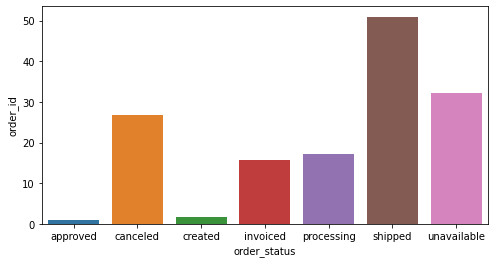

In [20]:
#детализация по причинам (график)
plt.figure(figsize=(8,4))
sns.barplot(data=mean_status, x="order_status", y="order_id")

#### Ответ 2: 
При вычислении было учтено,что данные по трем годам. Соответственно проиводилась разбивка не только по месяцам, но и по годам.

Если нас интересует среднее значение по каждому месяцу (за 3 года), то детализацию можно посмотреть тут: mean_count_y_m

Среднее значение не доставленных заказов по месяцам (за 3 года): mean_all = 123.458333

Детализацию недоставленных заказов с причинами (с разбивкой по годам и месяцам) можно посмотреть тут: mean_count_datalization

Среднее значение по детализации можно посмотреть тут (выше представлен график): mean_status

Мини выводы: 

Больше всего недоставленных заказов в ноябре (среднее значение за 3 года = 255).
Самая частая причина отсутствия доставки - shipped (Заказ отгружен, но не доставлен).